In [35]:
import pandas as pd
import numpy as np
import tensorflow as tf

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.svm import SVC, LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.metrics import plot_confusion_matrix
import scipy.stats as stats
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from sklearn.utils import resample
from sklearn.decomposition import PCA

In [3]:
df = pd.read_csv('clear_df.csv', sep='\t')
df.drop("Unnamed: 0", axis=1, inplace=True)
df

,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,icu_id,icu_stay_type,icu_type,...,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,hospital_death
0,68.000000,22.730000,0,2,1,180.3,1,92,0,2,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,9,0,0
1,77.000000,27.420000,0,2,0,160.0,1,90,0,5,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,8,6,0
2,25.000000,31.950000,0,2,0,172.7,0,93,0,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5,3,0
3,81.000000,22.640000,1,2,0,165.1,2,92,0,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0
4,19.000000,29.264902,0,2,1,188.0,0,91,0,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91708,75.000000,23.060250,0,2,1,177.8,1,927,0,3,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,9,0,0
91709,56.000000,47.179671,0,2,0,183.0,1,925,0,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0,0
91710,48.000000,27.236914,0,2,1,170.2,0,908,0,5,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,5,3,0
91711,61.748741,23.297481,0,2,0,154.9,0,922,0,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,6,0


C:\Users\asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hospital_death', ylabel='count'>

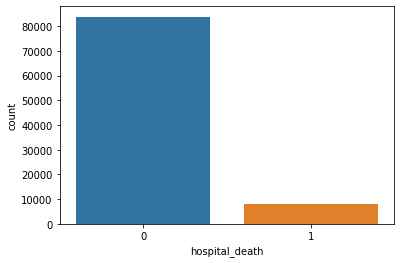

In [4]:
sns.countplot(df['hospital_death'])

In [5]:
df_majority = df[(df['hospital_death']==0)] 
df_minority = df[(df['hospital_death']==1)] 

df_minority_upsampled = resample(df_minority, 
                                 replace=True,
                                 n_samples= 83798,
                                 random_state=42)

df = pd.concat([df_minority_upsampled, df_majority])

C:\Users\asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='hospital_death', ylabel='count'>

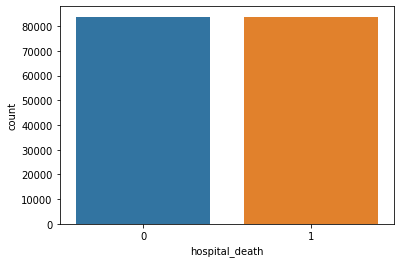

In [6]:
sns.countplot(df['hospital_death'])

In [25]:
pca = PCA(n_components=2).fit(df[df.columns[:-1]])
X_all = pca.transform(df[df.columns[:-1]])

In [28]:
new_df = pd.DataFrame(X_all, columns=['x1', 'x2'])

In [31]:
new_df['death'] = list(df['hospital_death'])
new_df

,x1,x2,death
0,-87.110231,265.725201,1
1,918.646820,378.876673,1
2,-370.192585,-303.161484,1
3,-398.480954,107.728266,1
4,101.699657,114.697572,1
...,...,...,...
167591,-5.977901,422.116625,0
167592,-3.551818,417.412331,0
167593,195.088557,406.264950,0
167594,-300.949871,409.716773,0


<AxesSubplot:xlabel='x1', ylabel='x2'>

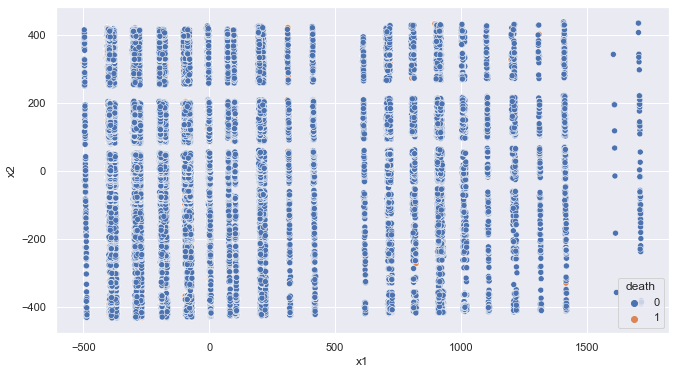

In [34]:
sns.set(rc = {'figure.figsize':(11,6)})
sns.scatterplot(data=new_df, x="x1", y="x2", hue='death')

In [7]:
#y = df.hospital_death
#X = df.values.tolist()

X_train, X_test, y_train, y_test = train_test_split(df[df.columns[:-1]], df['hospital_death'], test_size=0.2, random_state=42)

print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

134076
33520
134076
33520


## SVM

C:\Users\asus\anaconda3\lib\site-packages\sklearn\svm\_base.py:301: ConvergenceWarning: Solver terminated early (max_iter=3000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Precision: 0.4116
Recall: 0.4117
Accuracy: 0.4117
F1 Score: 0.4115
              precision    recall  f1-score   support

           0       0.41      0.39      0.40     16796
           1       0.41      0.43      0.42     16724

    accuracy                           0.41     33520
   macro avg       0.41      0.41      0.41     33520
weighted avg       0.41      0.41      0.41     33520



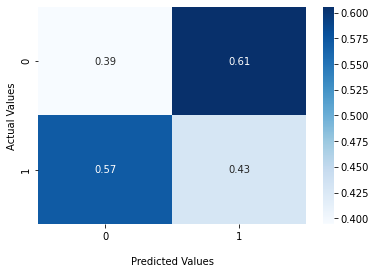

In [22]:
svm = make_pipeline(MinMaxScaler(), SVC(kernel='linear', max_iter=3000)).fit(X_train, y_train)
y_pred = svm.predict(X_test)

print('Precision: %.4f' % precision_score(y_test, y_pred, average='macro'))
print('Recall: %.4f' % recall_score(y_test, y_pred, average='macro'))
print('Accuracy: %.4f' % accuracy_score(y_test, y_pred))
print('F1 Score: %.4f' % f1_score(y_test, y_pred, average='macro'))
print(classification_report(y_test, y_pred))

table = sns.heatmap(confusion_matrix(y_test, y_pred)/np.sum(confusion_matrix(y_test, y_pred), axis=1)[:, np.newaxis], 
                    annot=True, fmt='.2f', cmap='Blues')
table.set_xlabel('\nPredicted Values')
table.set_ylabel('Actual Values')
plt.show()

## Logistic Regression

Precision: 0.7983
Recall: 0.7979
Accuracy: 0.7980
F1 Score: 0.7979
              precision    recall  f1-score   support

           0       0.79      0.82      0.80     16796
           1       0.81      0.78      0.79     16724

    accuracy                           0.80     33520
   macro avg       0.80      0.80      0.80     33520
weighted avg       0.80      0.80      0.80     33520



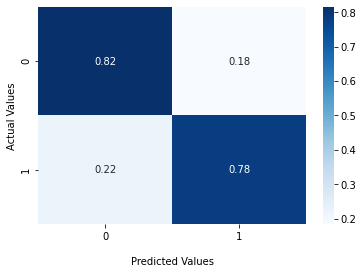

In [10]:
logreg = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000)).fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print('Precision: %.4f' % precision_score(y_test, y_pred, average='macro'))
print('Recall: %.4f' % recall_score(y_test, y_pred, average='macro'))
print('Accuracy: %.4f' % accuracy_score(y_test, y_pred))
print('F1 Score: %.4f' % f1_score(y_test, y_pred, average='macro'))
print(classification_report(y_test, y_pred))

table = sns.heatmap(confusion_matrix(y_test, y_pred)/np.sum(confusion_matrix(y_test, y_pred), axis=1)[:, np.newaxis], 
                    annot=True, fmt='.2f', cmap='Blues')
table.set_xlabel('\nPredicted Values')
table.set_ylabel('Actual Values')
plt.show()

## SGD Classifier

Precision: 0.7928
Recall: 0.7923
Accuracy: 0.7923
F1 Score: 0.7922
              precision    recall  f1-score   support

           0       0.78      0.81      0.80     16796
           1       0.80      0.77      0.79     16724

    accuracy                           0.79     33520
   macro avg       0.79      0.79      0.79     33520
weighted avg       0.79      0.79      0.79     33520



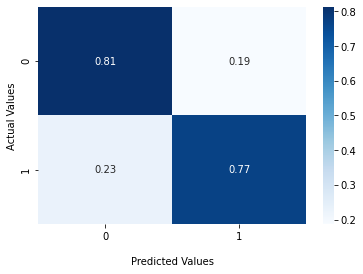

In [11]:
sgd = make_pipeline(StandardScaler(), SGDClassifier(max_iter=200)).fit(X_train, y_train)
y_pred = sgd.predict(X_test)

print('Precision: %.4f' % precision_score(y_test, y_pred, average='macro'))
print('Recall: %.4f' % recall_score(y_test, y_pred, average='macro'))
print('Accuracy: %.4f' % accuracy_score(y_test, y_pred))
print('F1 Score: %.4f' % f1_score(y_test, y_pred, average='macro'))
print(classification_report(y_test, y_pred))

table = sns.heatmap(confusion_matrix(y_test, y_pred)/np.sum(confusion_matrix(y_test, y_pred), axis=1)[:, np.newaxis], 
                    annot=True, fmt='.2f', cmap='Blues')
table.set_xlabel('\nPredicted Values')
table.set_ylabel('Actual Values')
plt.show()